In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
# preprocessing...we removed stopwords and applied stemming..stemming is the process of reducing inflected words to their base or root form

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [4]:
# Bag of words is created using the CountVectorizer which converts the words in the dataset into 0 and 1

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)

X = cv.fit_transform(corpus).todense()
y = dataset.iloc[:,1].values

In [5]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.20, random_state = 0)

In [6]:
# we'll use naive bayes classification

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
# confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)

Accuracy Score is : 0.73


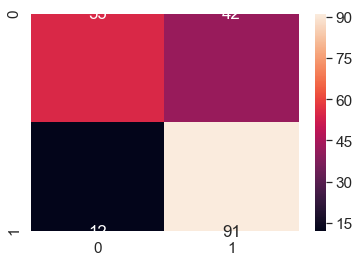

In [20]:
import seaborn as sns
      
df_cm = pd.DataFrame(Confusion_Matrix, range(2), range(2))

#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True)

print("Accuracy Score is :", Accuracy_Score)

In [29]:
# predict new reviews

newReview = input()

def predict(new_review):   

        new_review = re.sub("[^a-zA-Z]", " ", new_review)   
        new_review = new_review.lower().split()
        new_review = [ps.stem(word) for word in new_review if word not in set(stopwords.words("english"))]   
        new_review = " ".join(new_review)   

        new_review = [new_review]   
        new_review = cv.transform(new_review).toarray()   

        if classifier.predict(new_review)[0] == 1:
            return "Positive"   
        else:       
            return "Negative"

feedback = predict(newReview)

print("This review is: ", feedback) 

this food is amazing
This review is:  Positive


**this model doesn't work properly. just one of my early work. need improvement**